In [4]:
def border(aperture):
    together=[]
    for i, eachline in enumerate(aperture):
        for j, each in enumerate(eachline):
            if each==1:
                together.append([[j,j+1],[i,i]])
                together.append([[j,j+1],[i+1,i+1]])
                together.append([[j,j],[i,i+1]])
                together.append([[j+1,j+1],[i,i+1]])
    filtered=[]
    for each in together:
        c=0
        for EACH in together:
            if each==EACH:
                c+=1
        if c==1:
            filtered.append(each)
            
    return filtered

In [5]:
pwd

'/home/szabopal/PycharmProjects/halophot2'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from lightkurve import TessTargetPixelFile

In [9]:
import sys
terminalpythonpath=['', '/home/szabopal/PycharmProjects/venv36/lib/python36.zip', '/home/szabopal/PycharmProjects/venv36/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/site-packages']
[sys.path.append(each) for each in terminalpythonpath]
import matplotlib.pyplot as plt

In [10]:
hdul = fits.open("tess2018234152941-s0001-4-4-0120-s_ffic.fits")[0]
wcs = WCS(hdul.header)


sector1ffn='tess-s0001-4-4_83.40630967798376_-62.48977125108528_64x64_astrocut.fits'
tpf_s1 = TessTargetPixelFile(sector1ffn)


 [astropy.io.fits.verify]


In [11]:
coord = SkyCoord(ra=83.40630967798376, dec=-62.48977125108528, unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(1.1*32*1.414*21/3600, u.deg)
j = Gaia.cone_search_async(coord, radius)
r = j.get_results()
r.pprint()

Query finished.
         dist          ...
                       ...
---------------------- ...
5.2030643635554925e-06 ...
   0.00327731245051677 ...
  0.009260581924779184 ...
  0.010163180350853781 ...
  0.010232114986970185 ...
  0.010571988517761897 ...
  0.011291259288672972 ...
  0.011409032298542447 ...
  0.011498865367142749 ...
  0.011939990140685754 ...
                   ... ...
    0.2902291779564049 ...
    0.2902449607200544 ...
    0.2902527586203929 ...
   0.29025309481944134 ...
    0.2902618478458813 ...
    0.2902619481335399 ...
     0.290263731695323 ...
   0.29029045137346954 ...
   0.29032678519836996 ...
    0.2903327504180711 ...
Length = 15717 rows


In [82]:
lim=17

extractedgaiadata=[
r[(r['phot_g_mean_mag'] < lim)]['source_id'],
r[(r['phot_g_mean_mag'] < lim)]['ra'],
r[(r['phot_g_mean_mag'] < lim)]['dec'],
r[(r['phot_g_mean_mag'] < lim)]['phot_g_mean_mag'],
r[(r['phot_g_mean_mag'] < lim)]['phot_rp_mean_mag']]

In [83]:
sizearray=[]
for index, each in enumerate(extractedgaiadata[4]):
    if np.isscalar(each):
        sizearray.append(each)
    else:
        sizearray.append(extractedgaiadata[3][index])
brightness=np.asarray(sizearray)
sizearray=np.asarray(sizearray)

In [84]:
sizearray = 60*(np.max(sizearray)-sizearray)

In [85]:
ourap=np.asarray([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

ourap = ourap > 0

/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


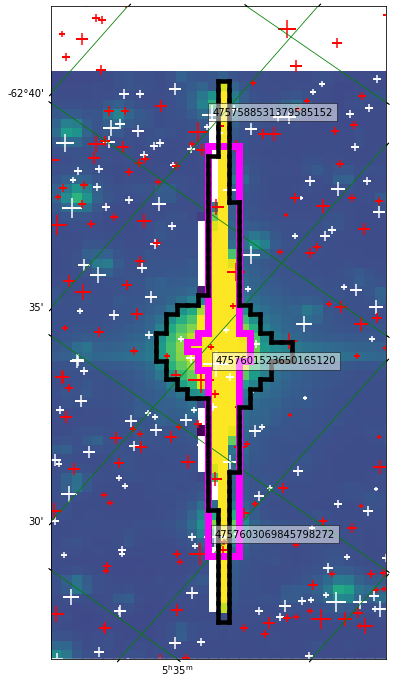

/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


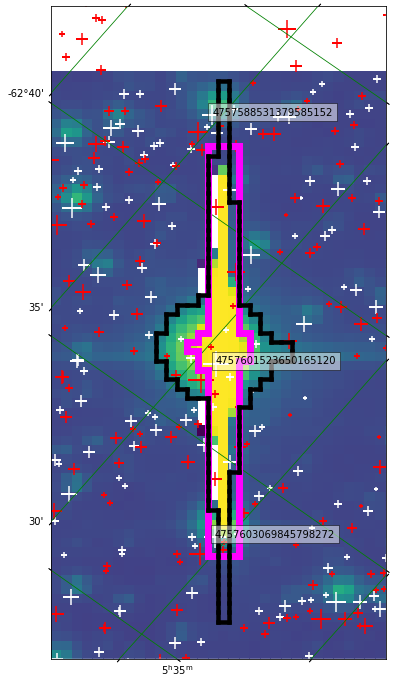

In [86]:
for eachindex in [954,1200]:
    
    proportiontosee=0.5

    fig = plt.figure(figsize=(12*proportiontosee,12))
    fig.add_subplot(111, projection=wcs)

    #plt.figure(figsize=(12,12))
    plt.pcolormesh(np.log(tpf_s1.flux[eachindex]))

    #filtered=border(tpf_s1.pipeline_mask*1)
    #for x in range(len(filtered)):
    #    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)




    spocaper=np.genfromtxt('betador_s0001_spocaperture_shiftedup.txt')
    spocaper=np.asarray(spocaper)
    spocaper=(spocaper == 75)*1
    filtered_spoc=border(spocaper)
    for x in range(len(filtered_spoc)):
        plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='magenta', linewidth=7)



    customaper=np.genfromtxt('betador_s0001_customaperture_shiftedup.txt')
    customaper=np.asarray(customaper)
    customaper=(customaper == 3)*1
    filtered_custom=border(customaper)
    for x in range(len(filtered_custom)):
        plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)



    #filtered_ourap=border(ourap)
    #for x in range(len(filtered_ourap)):
    #    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)

    ax = fig.gca()
    for x in range(len(extractedgaiadata[0])):
        ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])
    #    if brightness[x]<12:
    #        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

    #for x in range(len(extractedgaiadata[0])):
    #    ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        

    for x in range(len(extractedgaiadata[0])):
        ax.scatter(extractedgaiadata[1][x]+5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])        
        if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
            ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

    ax.set_xlim([64*(1-proportiontosee)/2, 64*(1+proportiontosee)/2])
    ax.set_ylim([0, 70])

    ax.coords.grid(True, color='green', ls='solid')
    
    plt.show()

/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


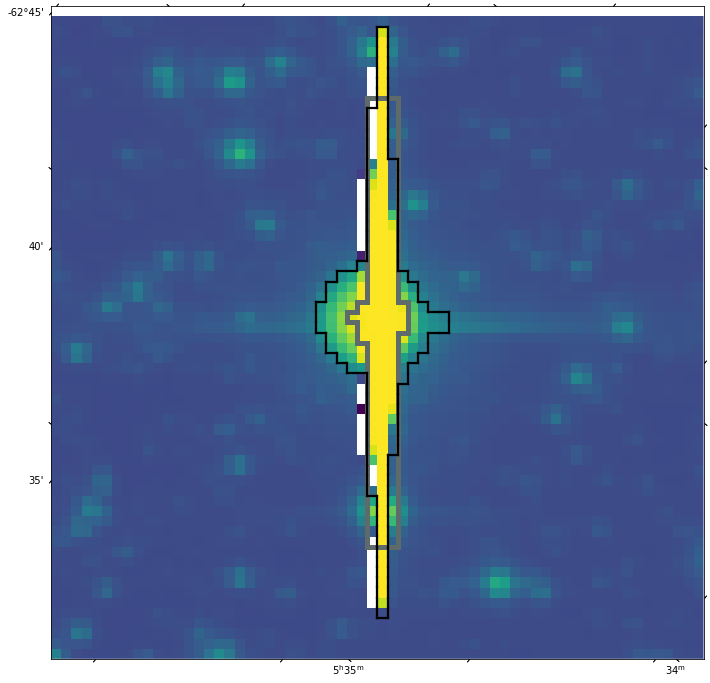

/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


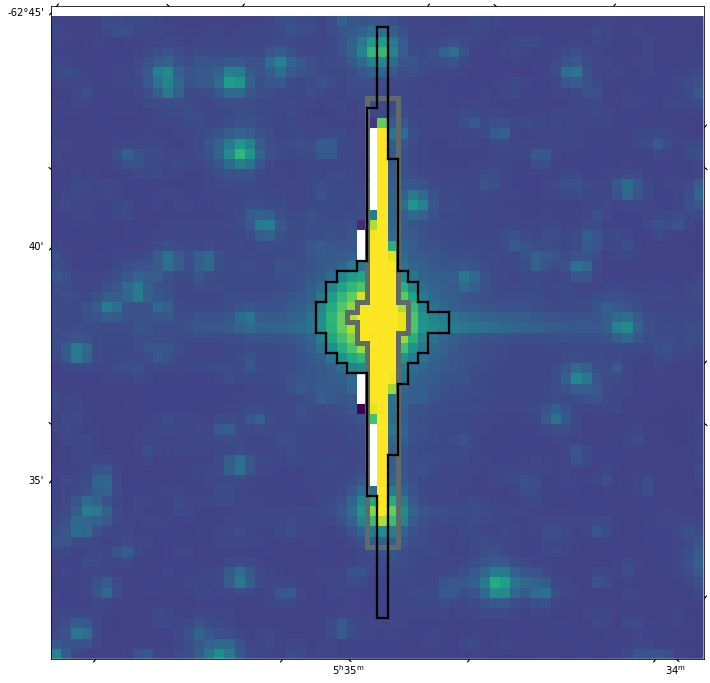

In [87]:
for eachindex in [954,1200]:
    
    proportiontosee=1

    fig = plt.figure(figsize=(12*proportiontosee,12))
    fig.add_subplot(111, projection=wcs)

    #plt.figure(figsize=(12,12))
    plt.imshow(np.log(tpf_s1.flux[eachindex]),cmap='viridis')

    
    #filtered=border(tpf_s1.pipeline_mask*1)
    #for x in range(len(filtered)):
    #    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)




    spocaper=np.genfromtxt('betador_s0001_spocaperture_shiftedup.txt')
    spocaper=np.asarray(spocaper)
    spocaper=(spocaper == 75)*1
    filtered_spoc=border(spocaper)
    for x in range(len(filtered_spoc)):
        plt.plot(np.asarray(filtered_spoc[x][0])+19-0.5,np.asarray(filtered_spoc[x][1])+0.5,c='#5F6A6A', linewidth=5)



    customaper=np.genfromtxt('betador_s0001_customaperture_shiftedup.txt')
    customaper=np.asarray(customaper)
    customaper=(customaper == 3)*1
    filtered_custom=border(customaper)
    for x in range(len(filtered_custom)):
        plt.plot(np.asarray(filtered_custom[x][0])+19-0.5,np.asarray(filtered_custom[x][1])+1-0.5,c='black', linewidth=2.25)



    #filtered_ourap=border(ourap)
    #for x in range(len(filtered_ourap)):
    #    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)

#    ax = fig.gca()
#    for x in range(len(extractedgaiadata[0])):
#        ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])
    #    if brightness[x]<12:
    #        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

    #for x in range(len(extractedgaiadata[0])):
    #    ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        

#    for x in range(len(extractedgaiadata[0])):
#        ax.scatter(extractedgaiadata[1][x]+5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])        
#        if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
#            ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

    ax.set_xlim([64*(1-proportiontosee)/2, 64*(1+proportiontosee)/2])
    ax.set_ylim([0, 70])

#    ax.coords.grid(True, color='green', ls='solid',alpha=1)
        
    
    plt.show()

/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


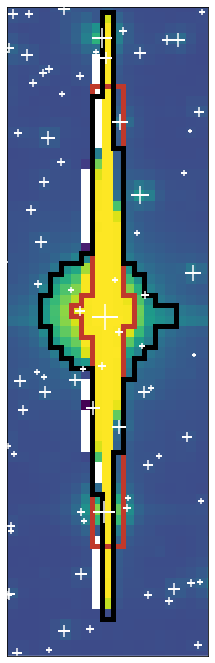

/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


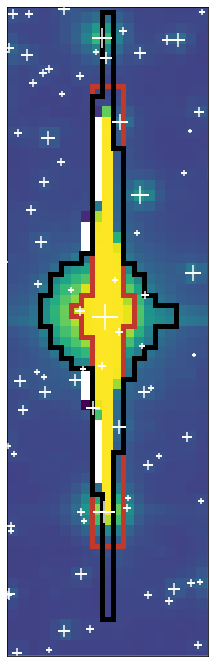

In [88]:
for eachindex in [954,1200]:
    
    proportiontosee=0.3
    shift=0
    
    fig = plt.figure(figsize=(12*proportiontosee,12))
    fig.add_subplot(111, projection=wcs)

    #plt.figure(figsize=(12,12))
    plt.imshow(np.log(tpf_s1.flux[eachindex]),cmap='viridis')
    
    ax = plt.gca()
    
    lon = ax.coords[0]
    lat = ax.coords[1]
    
    lon.set_ticks_visible(False)
    lon.set_ticklabel_visible(False)
    lat.set_ticks_visible(False)
    lat.set_ticklabel_visible(False)
    lon.set_axislabel('')
    lat.set_axislabel('')
    
    
    
    spocaper=np.genfromtxt('betador_s0001_spocaperture_shiftedup.txt')
    spocaper=np.asarray(spocaper)
    spocaper=(spocaper == 75)*1
    filtered_spoc=border(spocaper)
    for x in range(len(filtered_spoc)):
        plt.plot(np.asarray(filtered_spoc[x][0])+19-0.5,np.asarray(filtered_spoc[x][1])+0.5,c='#C0392B', linewidth=
                 5)



    customaper=np.genfromtxt('betador_s0001_customaperture_shiftedup.txt')
    customaper=np.asarray(customaper)
    customaper=(customaper == 3)*1
    filtered_custom=border(customaper)
    for x in range(len(filtered_custom)):
        plt.plot(np.asarray(filtered_custom[x][0])+19-0.5,np.asarray(filtered_custom[x][1])+1-0.5,c='black', linewidth=5)



    #filtered_ourap=border(ourap)
    #for x in range(len(filtered_ourap)):
    #    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)

#    ax = fig.gca()
#    for x in range(len(extractedgaiadata[0])):
#        ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])
    #    if brightness[x]<12:
    #        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

#    for x in range(len(extractedgaiadata[0])):
#        ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x],zorder=90)        

    for x in range(len(extractedgaiadata[0])):
        ax.scatter(extractedgaiadata[1][x]-1.20*21/3600, extractedgaiadata[2][x]-0.9*0.5*21/3600,transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x],zorder=100)        
   #     if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
   #         ax.text(extractedgaiadata[1][x]-4*0.75*21/3600, extractedgaiadata[2][x]-0.9*0.5*21/3600,extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

    ax.set_xlim([-shift+64*(1-proportiontosee)/2, -shift+64*(1+proportiontosee)/2])
    ax.set_ylim([0, 62])

#    ax.coords.grid(True, color='green', ls='solid',alpha=1)
        
    
    plt.show()

In [89]:
tpf_s1.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 90.634460449219  -57.666290283203  
CRPIX : 250.0  -984.0  
PC1_1 PC1_2  : -0.004072870593518  -0.004099999088794  
PC2_1 PC2_2  : 0.0040062544867396  -0.003967862110585  
CDELT : 1.0  1.0  
NAXIS : 64  64

In [90]:
wcs=WCS(hdul.header)

/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


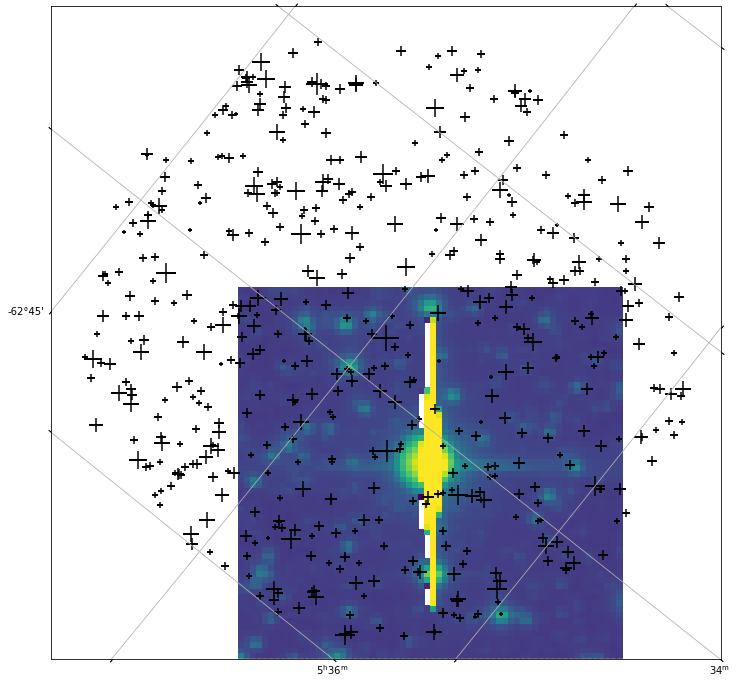

In [91]:
fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=tpf_s1.wcs)
plt.pcolormesh(np.log(tpf_s1.flux[0]))
ax = fig.gca()
for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],
               transform=ax.get_transform('world'),marker='+',c='black',s=sizearray[x])


/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


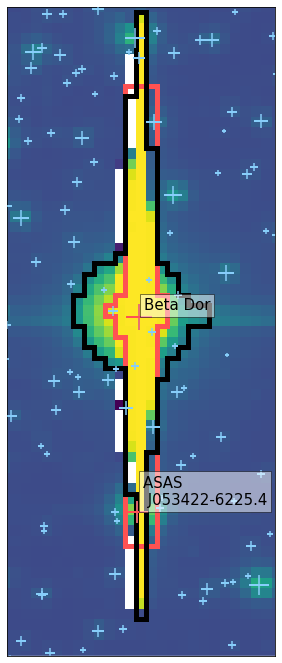

/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/szabopal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


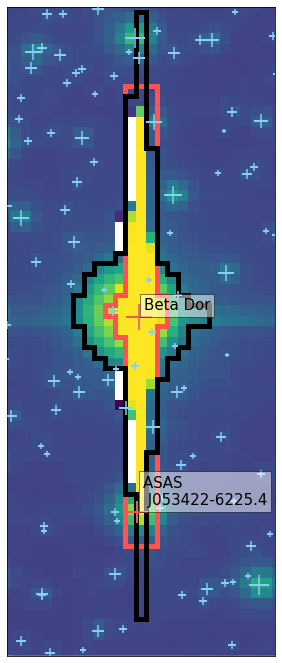

In [92]:
for eachindex in [954,1200]:
    
    proportiontosee=0.4
    shift=0
    
    fig = plt.figure(figsize=(12*proportiontosee,12))
    fig.add_subplot(111, projection=wcs)

    #plt.figure(figsize=(12,12))
    im = plt.imshow(np.log(tpf_s1.flux[eachindex]),cmap='viridis')
    
    ax = plt.gca()
    
    lon = ax.coords[0]
    lat = ax.coords[1]
    
    lon.set_ticks_visible(False)
    lon.set_ticklabel_visible(False)
    lat.set_ticks_visible(False)
    lat.set_ticklabel_visible(False)
    lon.set_axislabel('')
    lat.set_axislabel('')
    
    
    
    spocaper=np.genfromtxt('betador_s0001_spocaperture_shiftedup.txt')
    spocaper=np.asarray(spocaper)
    spocaper=(spocaper == 75)*1
    filtered_spoc=border(spocaper)
    for x in range(len(filtered_spoc)):
        plt.plot(np.asarray(filtered_spoc[x][0])+19-0.5,np.asarray(filtered_spoc[x][1])+0.5,c='#FF5252', linewidth=
                 5)



    customaper=np.genfromtxt('betador_s0001_customaperture_shiftedup.txt')
    customaper=np.asarray(customaper)
    customaper=(customaper == 3)*1
    filtered_custom=border(customaper)
    for x in range(len(filtered_custom)):
        plt.plot(np.asarray(filtered_custom[x][0])+19-0.5,np.asarray(filtered_custom[x][1])+1-0.5,c='black', linewidth=5)



    #filtered_ourap=border(ourap)
    #for x in range(len(filtered_ourap)):
    #    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)

#    ax = fig.gca()
#    for x in range(len(extractedgaiadata[0])):
#        ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])
    #    if brightness[x]<12:
    #        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

#    for x in range(len(extractedgaiadata[0])):
#        ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x],zorder=90)        

 #   for x in range(len(extractedgaiadata[0])):
 #       ax.scatter(extractedgaiadata[1][x]-1.20*21/3600, extractedgaiadata[2][x]-0.9*0.5*21/3600,
 #                  transform=ax.get_transform('world'),
 #                  marker='s',s=sizearray[x],zorder=100,
 #                  facecolors='none',edgecolors='lightskyblue',
 #                  linewidth=2)
        
    for x in range(len(extractedgaiadata[0])):
        ax.scatter(extractedgaiadata[1][x]-1.20*21/3600, extractedgaiadata[2][x]-0.9*0.5*21/3600,
                    transform=ax.get_transform('world'),
                    marker='+',s=sizearray[x],zorder=100,
                    color='lightskyblue')

        #if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
        #    ax.text(extractedgaiadata[1][x]-4*0.75*21/3600, extractedgaiadata[2][x]-0.9*0.5*21/3600,extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

        if extractedgaiadata[0][x] in [4757603069845798272]:
            ax.text(extractedgaiadata[1][x]-4*0.75*21/3600,
                    extractedgaiadata[2][x]-0.9*0.5*21/3600,
                    'ASAS \n J053422-6225.4',
                    transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5),
                    fontsize=15,
                    zorder=120)
        
            ax.scatter(extractedgaiadata[1][x]-1.20*21/3600, extractedgaiadata[2][x]-0.9*0.5*21/3600,
            transform=ax.get_transform('world'),
            marker='+',s=sizearray[x],zorder=100,
            color='#FF5252')
        
        if extractedgaiadata[0][x] in [4757601523650165120]:
            ax.text(extractedgaiadata[1][x]-4*0.75*21/3600,
                    extractedgaiadata[2][x]-0.9*0.5*21/3600,
                    'Beta Dor',
                    transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5),
                    fontsize=15,
                    zorder=120)
            
            ax.scatter(extractedgaiadata[1][x]-1.20*21/3600, extractedgaiadata[2][x]-0.9*0.5*21/3600,
            transform=ax.get_transform('world'),
            marker='+',s=sizearray[x],zorder=100,
            color='#FF5252')
        
        
            
    ax.set_xlim([-shift+64*(1-proportiontosee)/2, -shift+64*(1+proportiontosee)/2])
    ax.set_ylim([0, 62])

#    ax.coords.grid(True, color='green', ls='solid',alpha=1)
        
    
    plt.show()

In [93]:
sizearray

array([6.51812439e+02, 6.81670227e+01, 1.11364456e+02, 2.75605774e+01,
       3.86353683e+01, 7.23942413e+01, 4.07518959e+01, 7.51868286e+01,
       4.17593765e+01, 1.64991135e+02, 7.03554688e+01, 1.23650093e+02,
       3.98780823e+01, 4.60603523e+01, 2.68138504e+01, 4.79636192e+01,
       2.08977982e+02, 1.40029678e+02, 1.83193588e+01, 2.44089828e+02,
       1.35659866e+02, 1.27502121e+02, 1.89728973e+02, 9.52367020e+01,
       9.10358047e+01, 3.16027954e+02, 8.20122528e+01, 7.29793701e+01,
       1.50714630e+02, 2.07710205e+02, 1.25218735e+02, 8.18351593e+01,
       2.54410172e+01, 1.07517929e+02, 3.27518463e+01, 2.69064514e+02,
       3.46030426e+01, 8.20061340e+01, 4.01295090e+01, 5.03423309e+01,
       1.68771851e+02, 4.30232620e+01, 1.47502151e+02, 7.72996902e+01,
       2.69567871e+01, 3.26401520e+01, 1.89827789e+02, 1.31455658e+02,
       2.38791275e+01, 9.59757614e+01, 3.72420502e+01, 6.83494415e+01,
       3.57416153e+01, 1.76991638e+02, 2.24613190e+01, 1.01056023e+02,
      